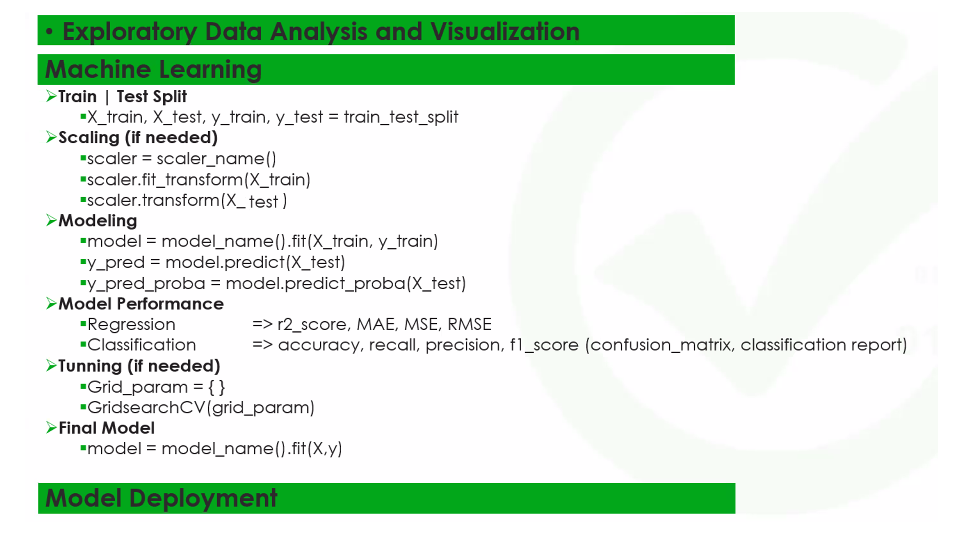

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

C:\Users\Monster\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.

Veri seti aşağıdaki özellikleri içermektedir:

   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

Bu veri seti, makine öğrenimi algoritmalarını eğitmek ve diyabet hastalığının tahmin edilmesi gibi ikili sınıflandırma problemlerinde kullanılmak üzere yaygın bir şekilde kullanılır. Veri seti, özellikle veri önişleme, özellik mühendisliği ve sınıflandırma algoritmalarının performanslarının karşılaştırılması gibi konularda kullanılır.

Veri setinin kullanıldığı tipik uygulamalar arasında, hangi hasta profillerinin diyabet riski taşıdığını anlamak, hangi özelliklerin diyabet olasılığını artırdığını belirlemek ve diyabet teşhisinin otomatik olarak konmasına yardımcı olacak tahmin modelleri geliştirmek bulunur.

Veri setinin doğası gereği, bazı özelliklerin eksik olabileceği veya dengesiz bir sınıf dağılımına sahip olabileceği gibi zorluklar içerebileceğini unutmamak önemlidir. Bu tür zorluklar, veri temizleme, eksik veri imputasyonu, dengesiz veri setlerini ele alma ve model doğrulama teknikleri gibi makine öğrenimi konularını derinlemesine inceleme fırsatı sunar.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

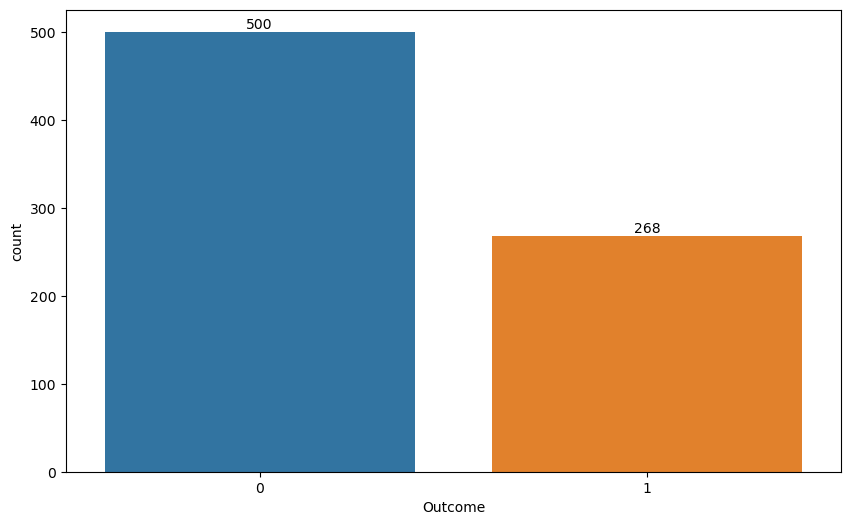

In [9]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

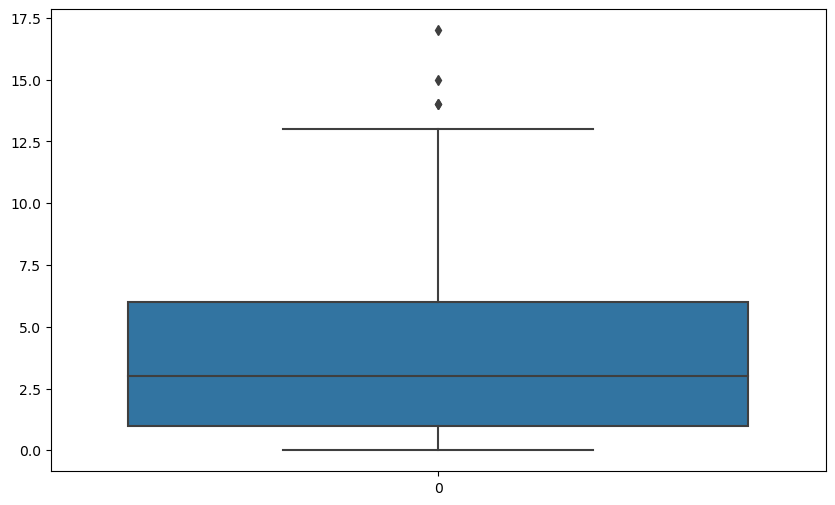

In [10]:
sns.boxplot(df.Pregnancies);

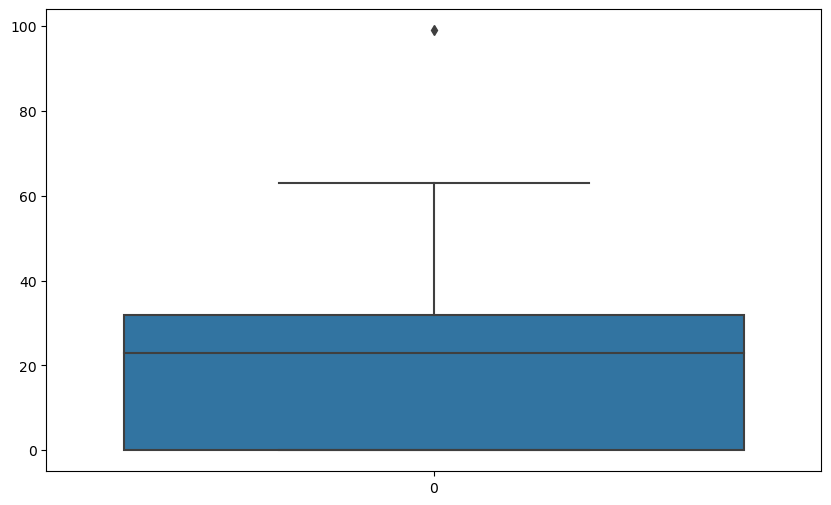

In [11]:
sns.boxplot(df.SkinThickness);

In [12]:
df = df[df.SkinThickness<70]

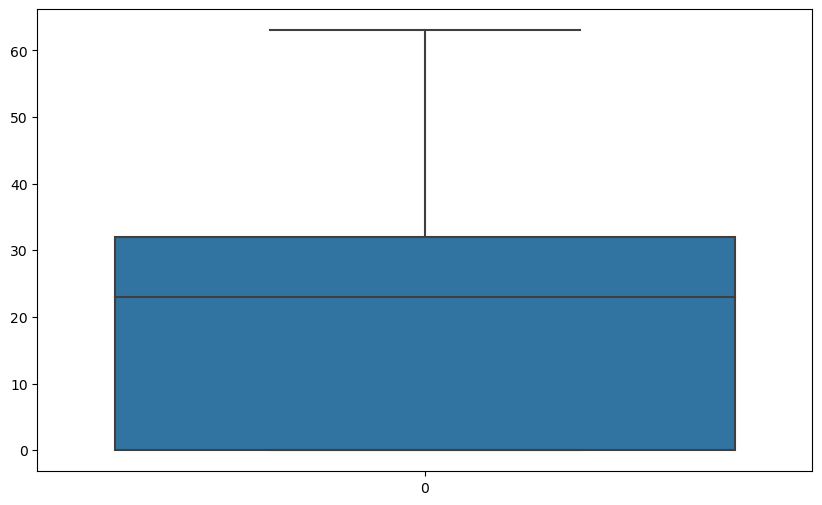

In [13]:
sns.boxplot(df.SkinThickness);

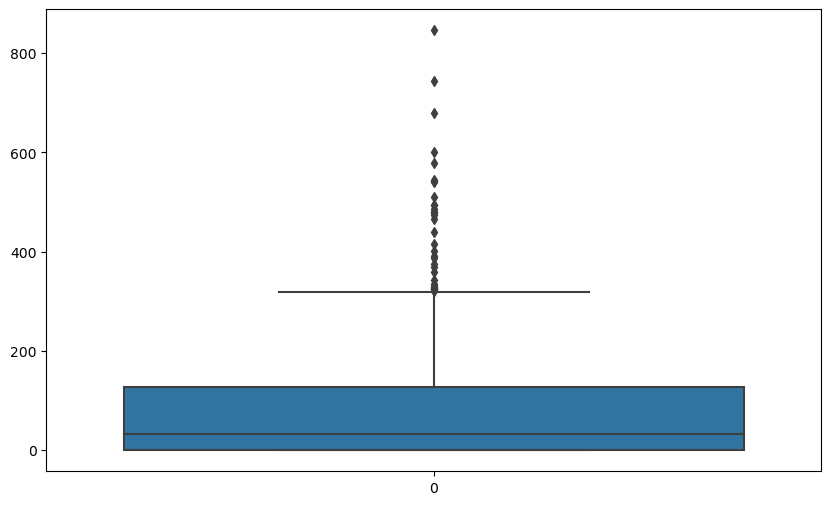

In [14]:
sns.boxplot(df.Insulin);

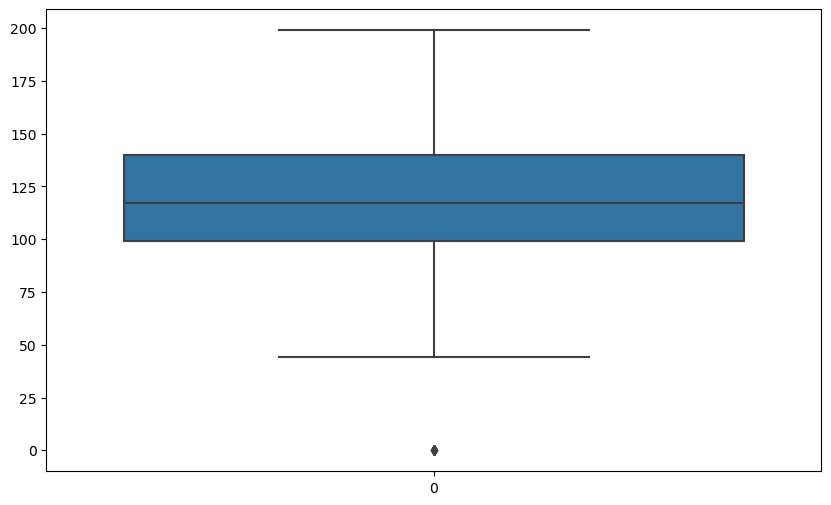

In [15]:
sns.boxplot(df.Glucose);

In [16]:
df = df[df.Glucose>0]

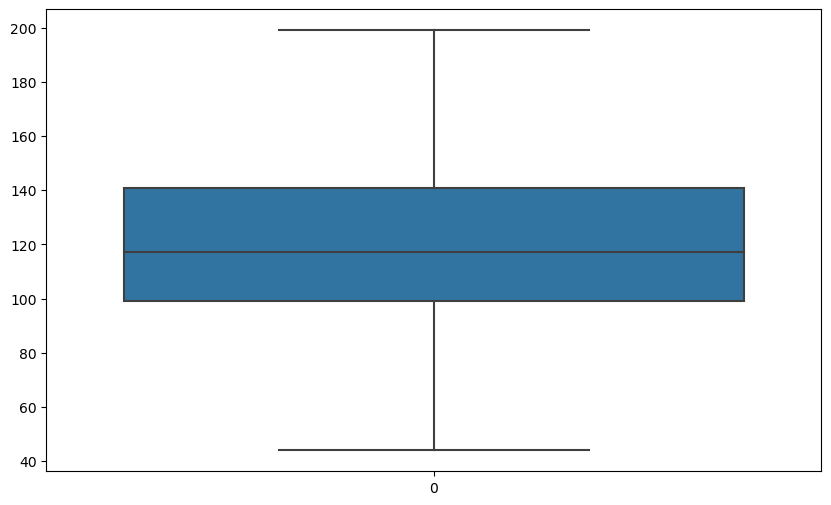

In [17]:
sns.boxplot(df.Glucose);

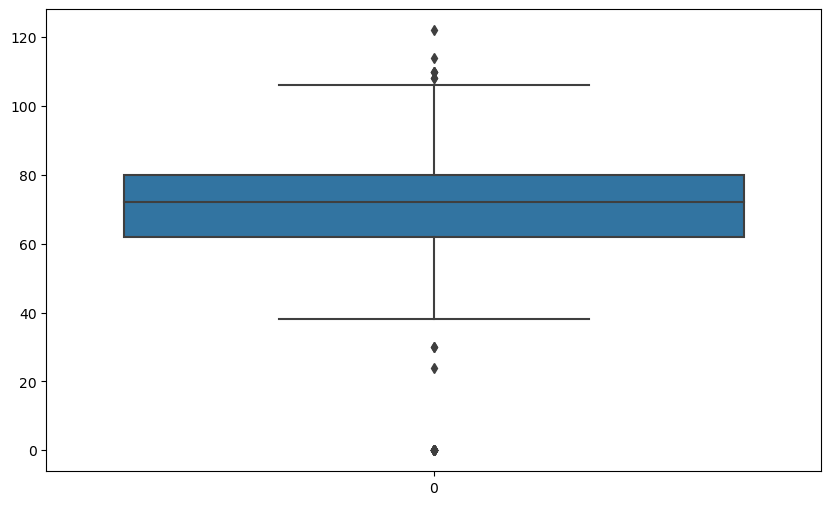

In [18]:
sns.boxplot(df.BloodPressure);

In [19]:
df = df[df.BloodPressure>35]

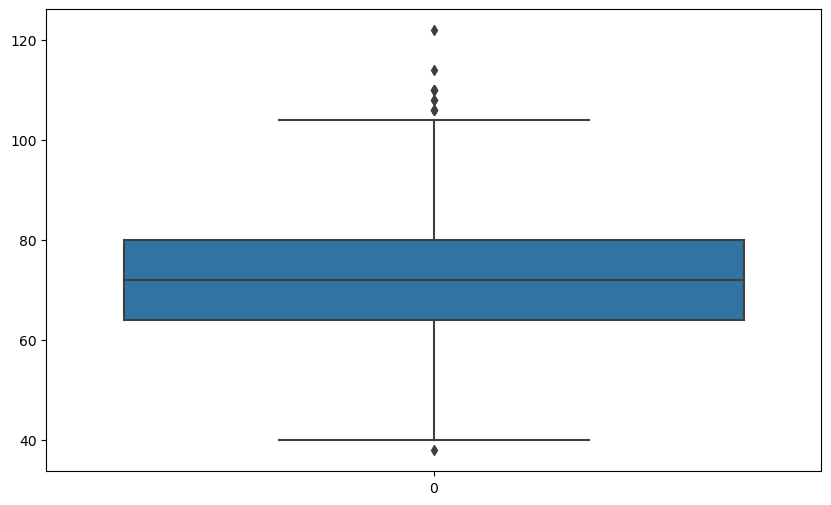

In [20]:
sns.boxplot(df.BloodPressure);

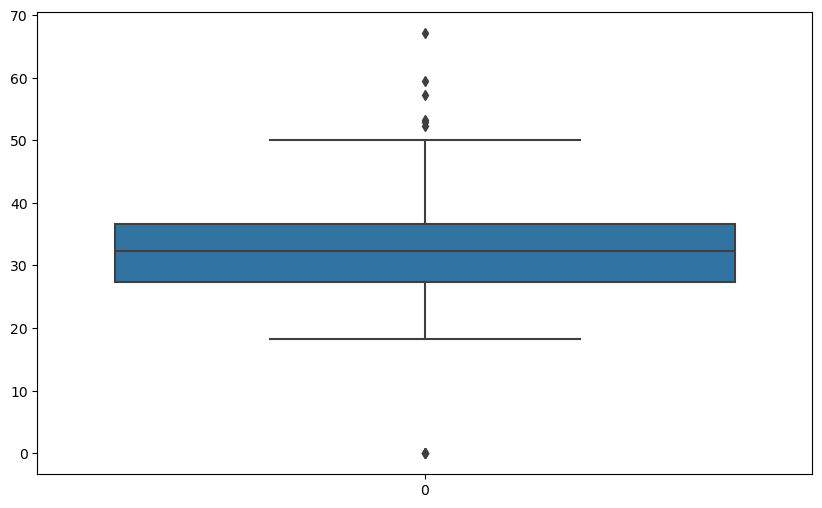

In [21]:
sns.boxplot(df.BMI);

In [22]:
df = df[df.BMI>0]

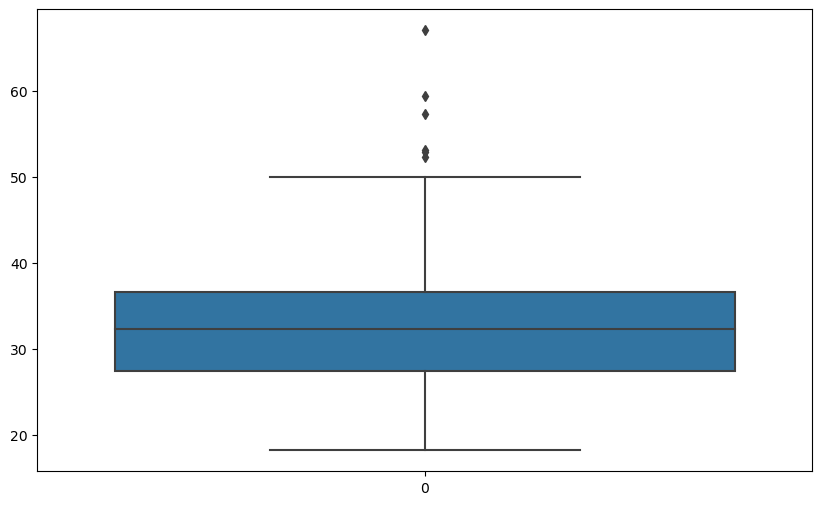

In [23]:
sns.boxplot(df.BMI);

In [24]:
df.shape  

(720, 9)

In [25]:
df.Outcome.value_counts() 

Outcome
0    473
1    247
Name: count, dtype: int64

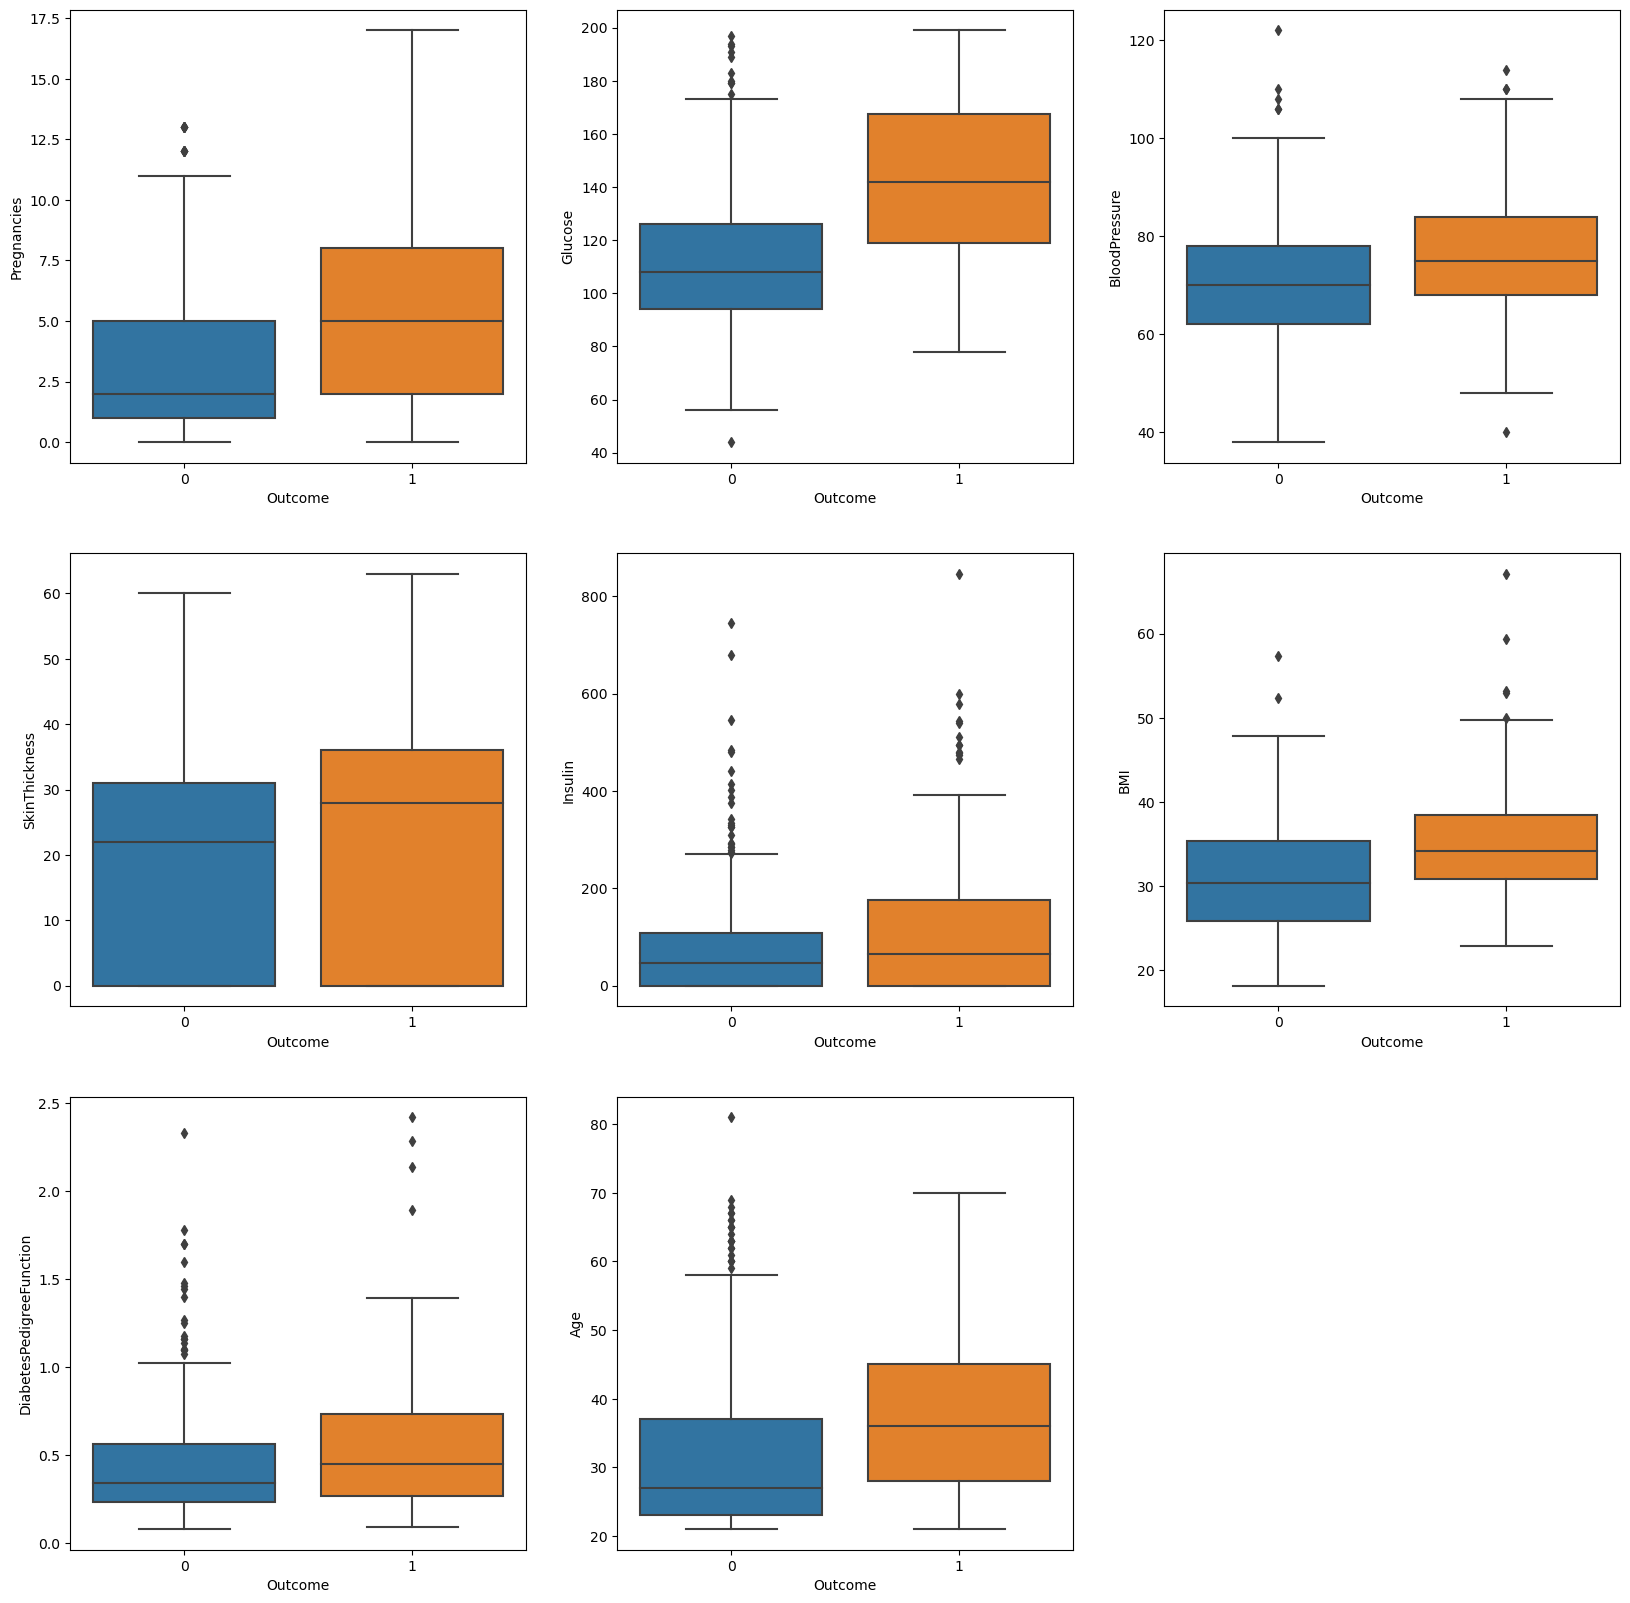

In [26]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [27]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

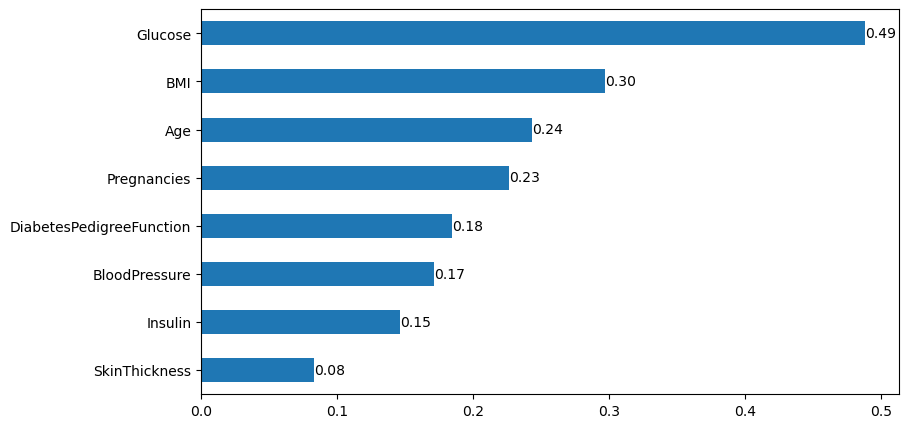

In [28]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

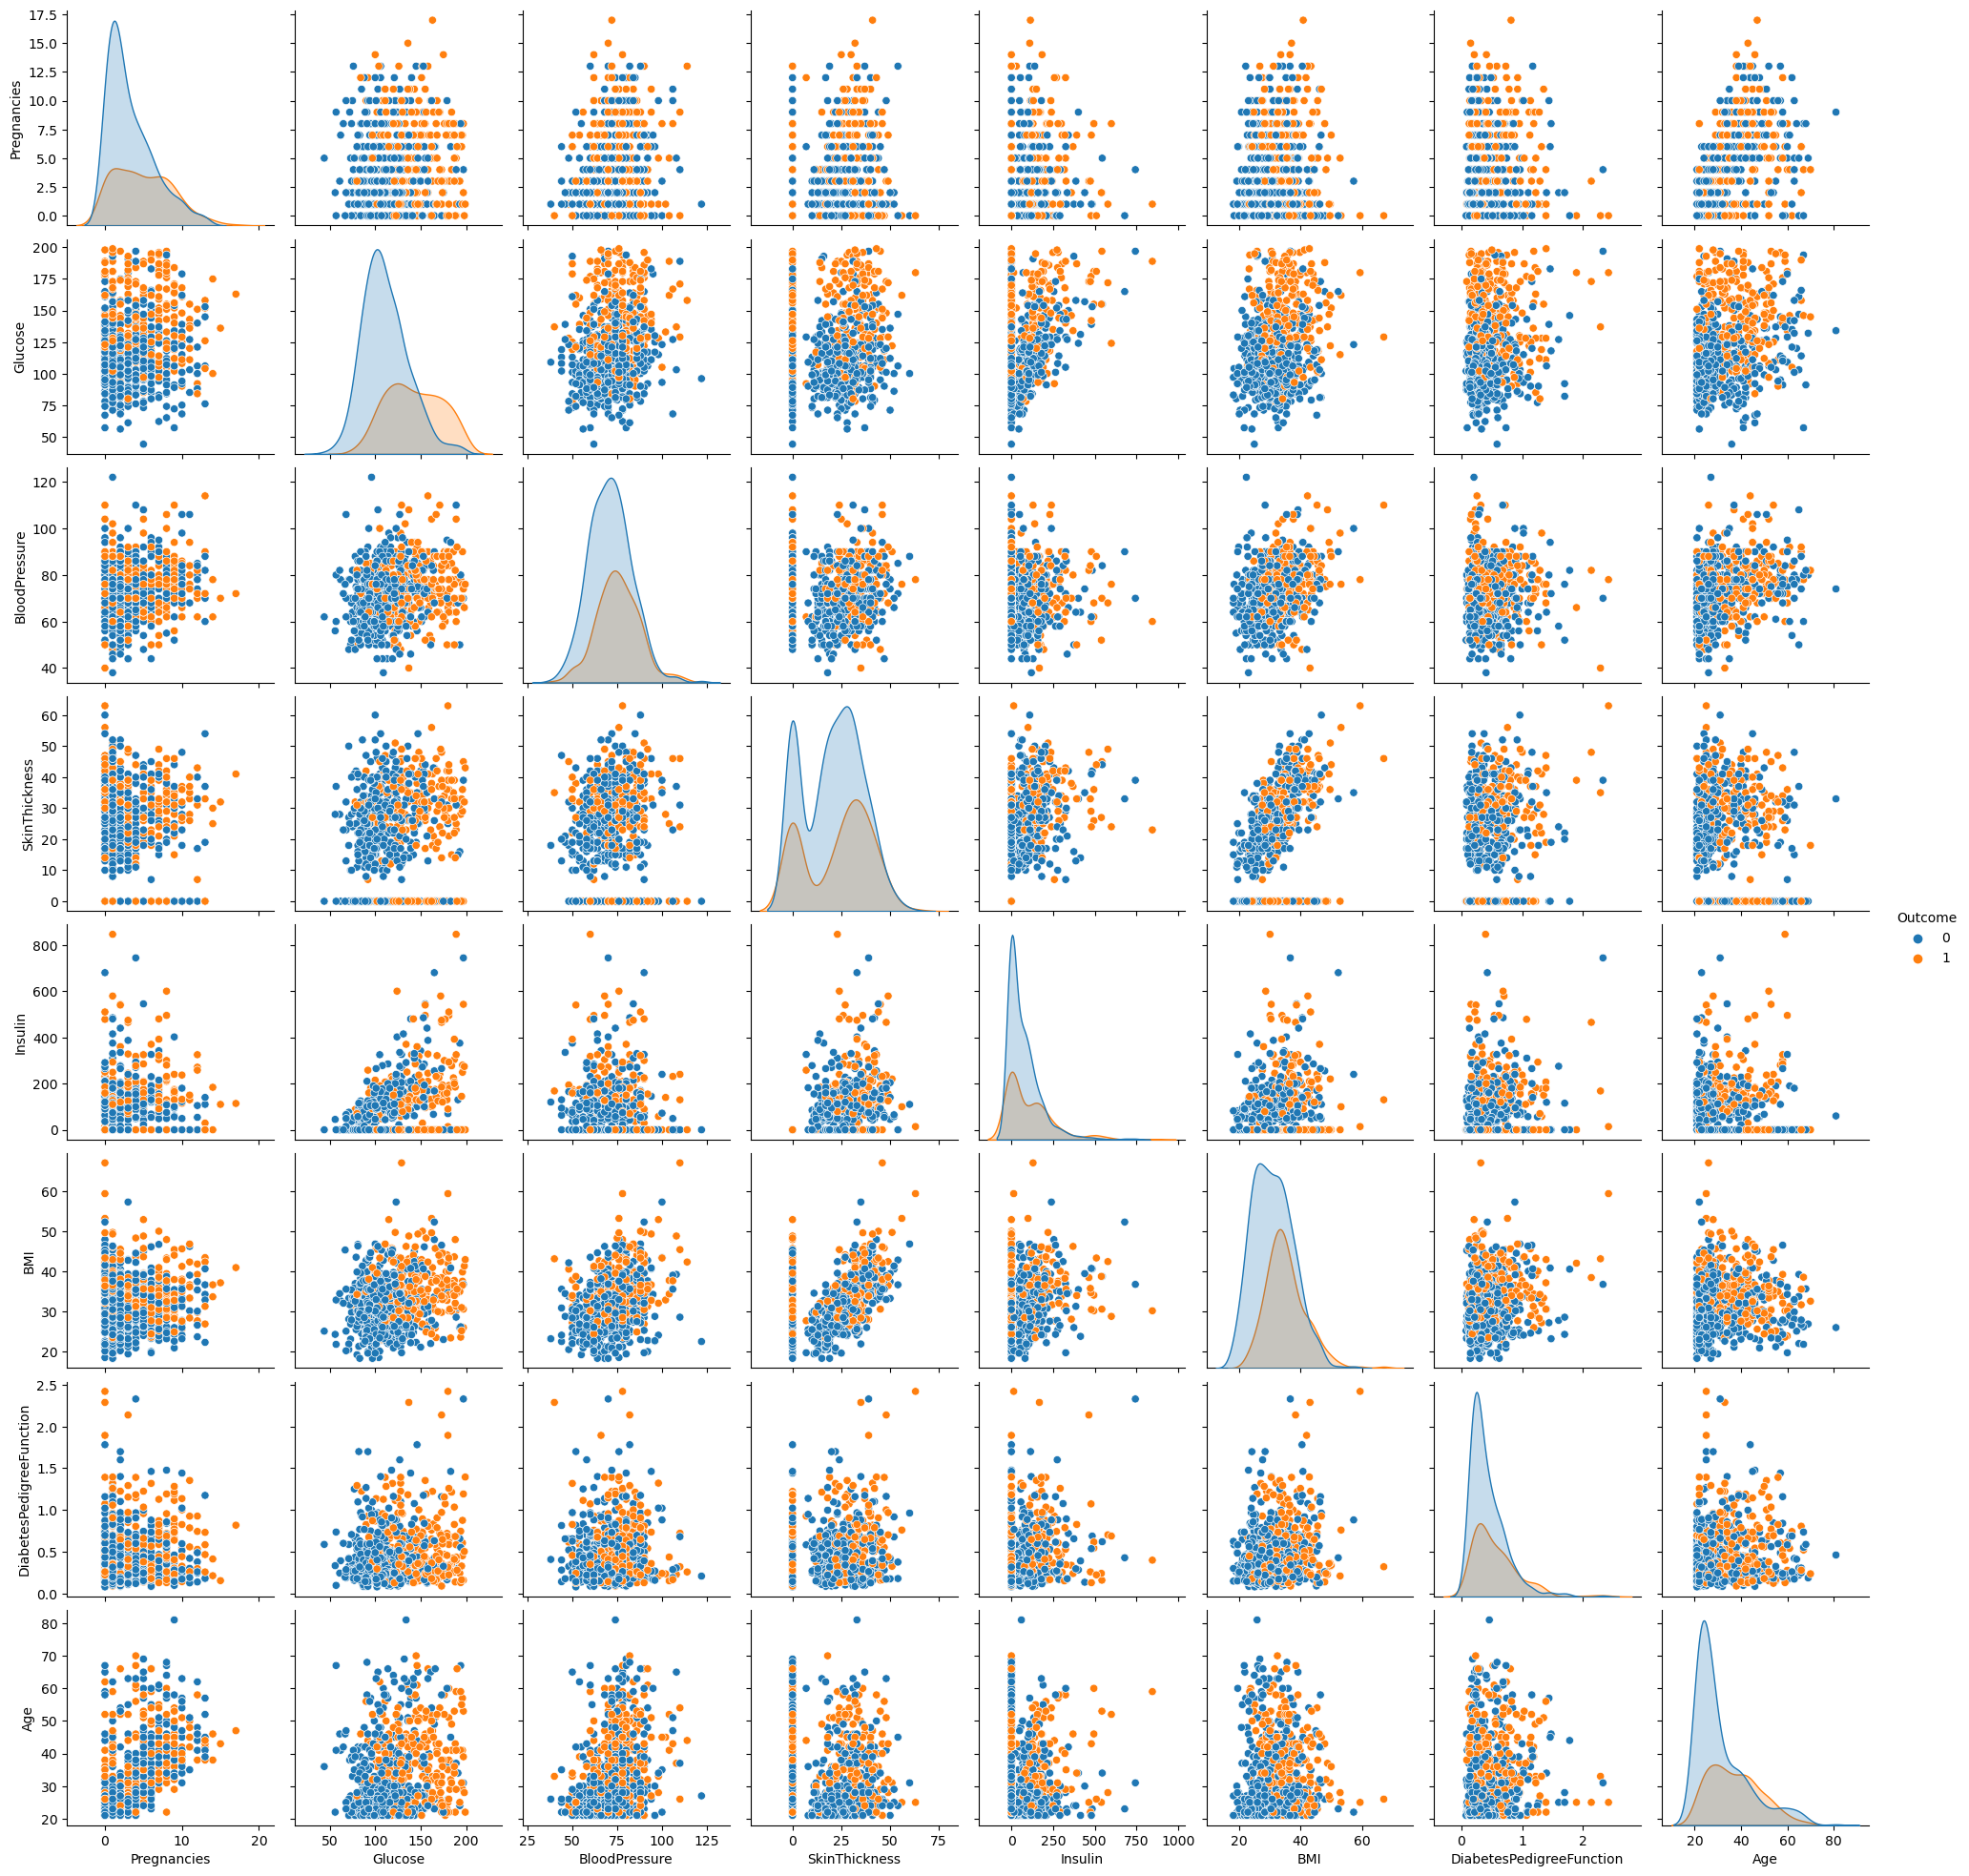

In [29]:
sns.pairplot(df, hue = "Outcome");

# Train | Test Split

In [30]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# classification datalarını train ve test setlerine ayırırken eğer datamız inbalanced ise stratify=y parametresini
# mutlaka kullanmalıyız. Stratify parametresi 0 ve 1 classlarının birbirine olan oranını hem train datasında hemde test 
# datasında korur.

# Inbalanced datalarda bu parametre kullanılmaz ise az olan class train veya test setine dengesiz bir şekilde dağıtılabilir. 
# Bu da doğal olarak inbalanced olan classın scorlarını düşürür.

# Datanız balanced da olsa inbalanced da olsa hepsinde stratify=y kullanabilirsiniz.

In [34]:
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.65625
1    0.34375
Name: proportion, dtype: float64

Outcome
0    0.659722
1    0.340278
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


# Modelling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [37]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23392748, 0.76607252],
       [0.11962655, 0.88037345],
       [0.5815906 , 0.4184094 ],
       [0.81462769, 0.18537231],
       [0.19171825, 0.80828175],
       [0.91048525, 0.08951475],
       [0.76392155, 0.23607845],
       [0.13938413, 0.86061587],
       [0.97123592, 0.02876408],
       [0.88970359, 0.11029641],
       [0.71503987, 0.28496013],
       [0.7579888 , 0.2420112 ],
       [0.82992689, 0.17007311],
       [0.8125758 , 0.1874242 ],
       [0.09746237, 0.90253763],
       [0.98344195, 0.01655805],
       [0.84873299, 0.15126701],
       [0.3012461 , 0.6987539 ],
       [0.6240152 , 0.3759848 ],
       [0.9273214 , 0.0726786 ],
       [0.54064267, 0.45935733],
       [0.97776597, 0.02223403],
       [0.225094  , 0.774906  ],
       [0.88703843, 0.11296157],
       [0.7614778 , 0.2385222 ],
       [0.69337877, 0.30662123],
       [0.89996383, 0.10003617],
       [0.57200427, 0.42799573],
       [0.7398721 , 0.2601279 ],
       [0.83988274, 0.16011726],
       [0.

In [39]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # 1 sınıfına ait olma olasılıkları
test_data.sample(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
324            2      112             75             32        0  35.7   
355            9      165             88              0        0  30.4   
414            0      138             60             35      167  34.6   
174            2       75             64             24       55  29.7   
452            0       91             68             32      210  39.9   
363            4      146             78              0        0  38.5   
756            7      137             90             41        0  32.0   
741            3      102             44             20       94  30.8   
504            3       96             78             39        0  37.3   
512            9       91             68              0        0  24.2   
520            2       68             70             32       66  25.0   
702            1      168             88             29        0  35.0   
260            3      191             68             15      130  30.9   
147            2      106             64             35      119  30.5   
259           11      155             76             28      150  33.3   
233            4      122             68              0        0  35.0   
508            2       84             50             23       76  30.4   
630            7      114             64              0        0  27.4   
578           10      133             68              0        0  27.0   
719            5       97             76             27        0  35.6   

     DiabetesPedigreeFunction  Age  Outcome  pred  pred_proba  
324                     0.148   21        0     0    0.189916  
355                     0.302   49        1     1    0.746188  
414                     0.534   21        1     0    0.353692  
174                     0.370   33        0     0    0.045362  
452                     0.381   25        0     0    0.110836  
363                     0.520   67        1     1    0.711545  
756                     0.391   39        0     0    0.490827  
741                     0.400   26        0     0    0.160117  
504                     0.238   40        0     0    0.172498  
512                     0.200   58        0     0    0.118942  
520                     0.187   25        0     0    0.017039  
702                     0.905   52        1     1    0.752715  
260                     0.299   34        0     1    0.767116  
147                     1.400   34        0     0    0.275102  
259                     1.353   51        1     1    0.900299  
233                     0.394   29        0     0    0.368999  
508                     0.968   21        0     0    0.115631  
630                     0.732   34        1     0    0.322008  
578                     0.245   36        0     0    0.459357  
719                     0.378   52        1     0    0.232168

## Model Performance on Classification Tasks

**Ne Zaman Macro Skorlara Bakıyoruz, Ne Zaman Accuracy'ye Bakıyoruz?**

Dengesiz veri setleri, bazı sınıfların diğerlerine göre çok daha fazla örneğe sahip olduğu durumlardır. Örneğin, bir hastalığı teşhis eden bir modelde, hastalığa sahip olmayan (negatif) örneklerin sayısı, hastalığa sahip (pozitif) örneklerden çok daha fazla olabilir. Bu durumda, modelin çoğunluk sınıfını (negatif örnekler) öğrenmesi ve azınlık sınıfını (pozitif örnekler) göz ardı etmesi riski vardır. Bu tür dengesiz veri setlerinde hangi metriklerin kullanılması gerektiğini anlamak önemlidir.

**Macro Metrikler**

Dengesiz veri setlerinde, "macro" metriklere bakmak gerekir. Macro metrikler, her sınıf için ayrı ayrı hesaplanan performans metriklerinin basit bir şekilde ortalamasını alır. Örneğin, "macro F1 skoru", her sınıf için ayrı ayrı hesaplanan F1 skorlarının aritmetik ortalamasıdır. Bu durum, azınlık sınıfının performansını göz ardı etmeyi zorlaştırır ve modelin tüm sınıfları dengeli bir şekilde öğrenmesini sağlar.

**Macro Metriklerin Özellikleri:**
- Her sınıfın performansını ayrı ayrı değerlendirir.
- Modelin tüm sınıfları dengeli bir şekilde öğrenip öğrenmediğini gösterir.
- Azınlık sınıfların performansını göz ardı etmeyi zorlaştırır.

**Accuracy (Doğruluk) Metrikleri**

Accuracy (doğruluk) metriği ise genellikle dengesiz veri setlerinde yanıltıcı olabilir. Eğer bir model, çoğunluk sınıfını sürekli doğru tahmin ederse, yüksek bir doğruluk skoru elde edebilir. Bu durum, modelin azınlık sınıfı üzerinde iyi performans gösterdiği anlamına gelmez. Dolayısıyla, dengesiz veri setlerinde doğruluk yerine "macro" metrikler tercih edilir.

**Accuracy Metriklerinin Sınırlamaları:**
- Dengesiz veri setlerinde yanıltıcı olabilir.
- Çoğunluk sınıfı doğru tahmin edilse bile azınlık sınıfının performansı göz ardı edilebilir.
- Modelin azınlık sınıfları öğrenmedeki başarısını yansıtmaz.

**Sonuç**

Dengesiz veri setlerinde model performansını değerlendirirken macro metrikler kullanmak, her sınıfın performansını ayrı ayrı değerlendirdiği ve azınlık sınıfların performansını göz ardı etmediği için daha doğru bir yaklaşım sağlar. Accuracy metriği ise dengesiz veri setlerinde yanıltıcı olabileceği için dikkatli kullanılmalıdır. 

Modelin tüm sınıfları üzerinde dengeli bir performans göstermesi isteniyorsa, macro metriklere odaklanmak en iyi yaklaşım olacaktır. Bu, modelin yalnızca çoğunluk sınıfında değil, aynı zamanda azınlık sınıflarında da iyi performans göstermesini sağlar ve böylece genel model performansına daha bütüncül bir bakış açısı sunar.

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

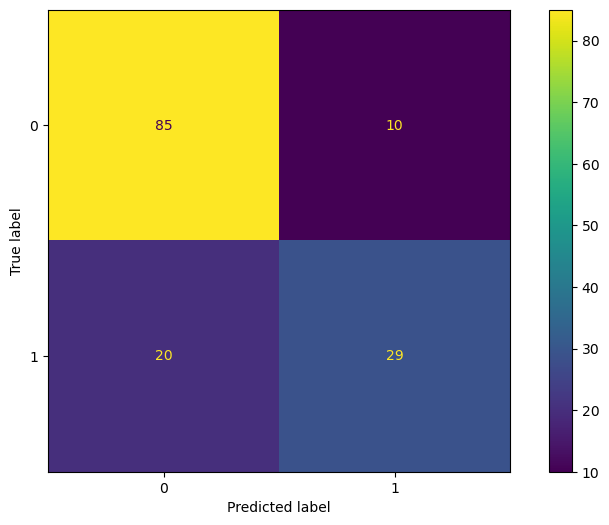

In [41]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [45]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)  #default 5

# her iterasyonda train ve test setlerinin içerisine başlangıçtaki oranı ile "y" ait sınıfları yerleştirir.

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1   0.006983    0.006977       0.706897        0.776062        0.600000   
2   0.005984    0.006982       0.724138        0.785714        0.642857   
3   0.004986    0.006983       0.844828        0.766409        0.923077   
4   0.004499    0.005985       0.827586        0.768340        0.857143   
5   0.005984    0.005984       0.775862        0.776062        0.705882   
6   0.004988    0.005983       0.741379        0.776062        0.647059   
7   0.004986    0.005984       0.771930        0.770713        0.714286   
8   0.003989    0.006981       0.754386        0.772640        0.647059   
9   0.003989    0.005985       0.771930        0.761079        0.733333   
10  0.004987    0.005984       0.719298        0.778420        0.625000   

    train_precision  test_recall  train_recall   test_f1  train_f1  
1          0.718310     0.450000      0.573034  0.514286  0.637500  
2          0.744526     0.450000      0.573034  0.529412  0.647619  
3          0.717557     0.600000      0.528090  0.727273  0.608414  
4          0.716418     0.600000      0.539326  0.705882  0.615385  
5          0.727941     0.600000      0.556180  0.648649  0.630573  
6          0.727941     0.550000      0.556180  0.594595  0.630573  
7          0.723881     0.526316      0.541899  0.606061  0.619808  
8          0.719424     0.578947      0.558659  0.611111  0.628931  
9          0.698529     0.550000      0.533708  0.628571  0.605096  
10         0.729927     0.500000      0.561798  0.555556  0.634921

In [46]:
df_scores.mean()[2:]

# train ve test score lari kendi icinde tutarli gorunuyor, overfitting yok

test_accuracy      0.763823
train_accuracy     0.773150
test_precision     0.709570
train_precision    0.722445
test_recall        0.540526
train_recall       0.552191
test_f1            0.612139
train_f1           0.625882
dtype: float64

In [47]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [48]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# make_score ile default olarak atanan Class 1  yerine diğer clasları almak için kullanılır.
# f1_score içinde geçen pos_label =0 parametresini make_scorer içinde kullanarak class değerini değiştirip 
# diğer classlara da işlemler yapabiliriz.
# make_scorer'a eşitlediğimiz metricleri mutlaka bir dictionary içerisinde tanımlayıp bir değişkene (scoring) atıyoruz.

In [49]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)  #default 5

# her iterasyonda train ve test setlerinin içerisine başlangıçtaki oranı ile "y" ait sınıfları yerleştirir.

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

fit_time  score_time  test_precision_0  train_precision_0  test_recall_0  \
1   0.006980    0.007486          0.744186           0.797872       0.842105   
2   0.005984    0.005983          0.750000           0.800525       0.868421   
3   0.003989    0.005984          0.822222           0.782946       0.973684   
4   0.004987    0.005983          0.818182           0.786458       0.947368   
5   0.003990    0.006980          0.804878           0.793194       0.868421   
6   0.003989    0.006982          0.780488           0.793194       0.842105   
7   0.004986    0.005985          0.790698           0.787013       0.894737   
8   0.004986    0.005984          0.800000           0.792105       0.842105   
9   0.004986    0.005984          0.785714           0.783290       0.891892   
10  0.004986    0.005984          0.756098           0.795812       0.837838   

    train_recall_0  test_f1_0  train_f1_0  
1         0.882353   0.790123    0.837989  
2         0.897059   0.804878    0.846047  
3         0.891176   0.891566    0.833563  
4         0.888235   0.878049    0.834254  
5         0.891176   0.835443    0.839335  
6         0.891176   0.810127    0.839335  
7         0.891176   0.839506    0.835862  
8         0.885294   0.820513    0.836111  
9         0.879765   0.835443    0.828729  
10        0.891496   0.794872    0.840941

In [50]:
df_scores.mean()[2:]

# test setindeki 0 clasına ait skorlar ile tutatlı 

test_precision_0     0.785247
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.830052
train_f1_0           0.837217
dtype: float64

In [51]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

[Logistic Regression Hyperparametreleri](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [52]:
pipe_model.get_params()

# gridsearchCV içerisinde eğer pipeline modeli kullanacaksak pipeline içerisine tanımlanmış olan ML algoritmasına ait
# hyper_parametrelerin listesini get_params() ile görebiliyoruz.

# gridsearchCvnin param_grid parametrresinin içine yazacağımız hyper_parametreleri aşağıda belirtildiği haliyle yazmalıyız.

# Dikkat ederseniz pipeline içerisinde ML modeline verdiğimiz "logistic" isminden sonra 2 tane alt tire(__) sonra
# ML modelinin kendi hyper parametre isminin yazdığına dikkat edin.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [53]:
pipe_model.set_params(logistic__C=0.5)  #0.8 yazarsanız default hali 0.8 olur

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=0.5))])

In [54]:
pipe_model.get_params()   # logistic__C=0.5 oldu

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(C=0.5))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=0.5),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 0.5,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak. 

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek

# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik 

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # Default olarak 1 sınıfının scorunu max. eder. 0 sınıfınınkini max. etmek isterseniz f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [57]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [58]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [59]:
grid_model.best_estimator_

# best_estimator_ default hyperparametreleri döndürmez, sadece default değerden farklı olanları döndürür

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [60]:
grid_model.best_index_

1

In [61]:
pd.DataFrame(grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

# ilgili df'in best indexinden "mean_test_score" ile "mean_train_score" ları çekilip karşılaştırılırak overfitig,
# underfiting değerlendirilmesi yapılır. 

# GridsearchCV aynı zamanda Cross validation işlemi de yaptığından extradan cross validation yapmamıza gerek yok.

# Burda aldığımız scorelar gridsearchcv içerisine verdiğimiz scoring metricinin scorelarıdır.

mean_test_score     0.737895
mean_train_score      0.7514
Name: 1, dtype: object

In [62]:
grid_model.best_score_

0.7378947368421053

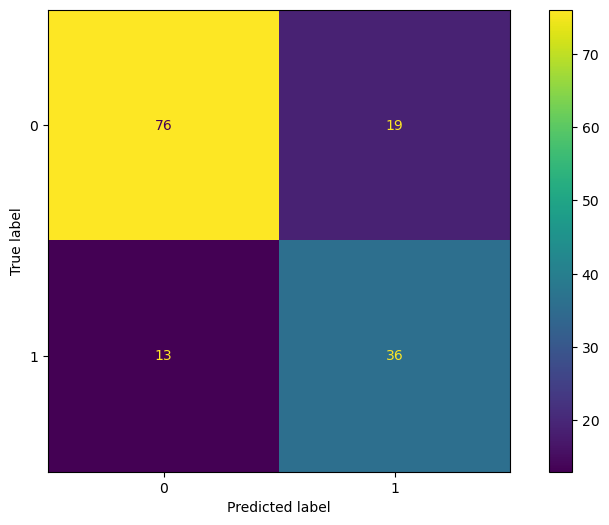

In [63]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [64]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



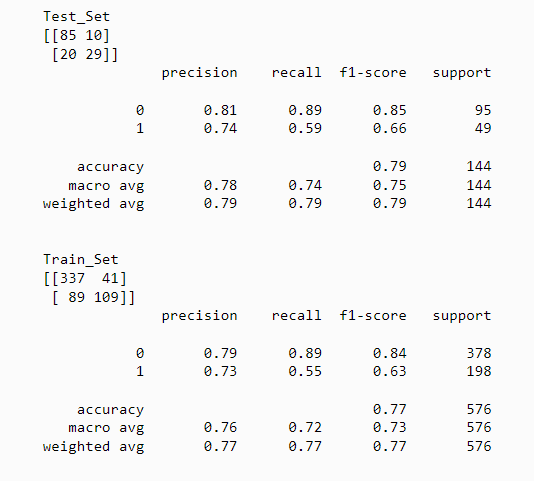

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

In [65]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

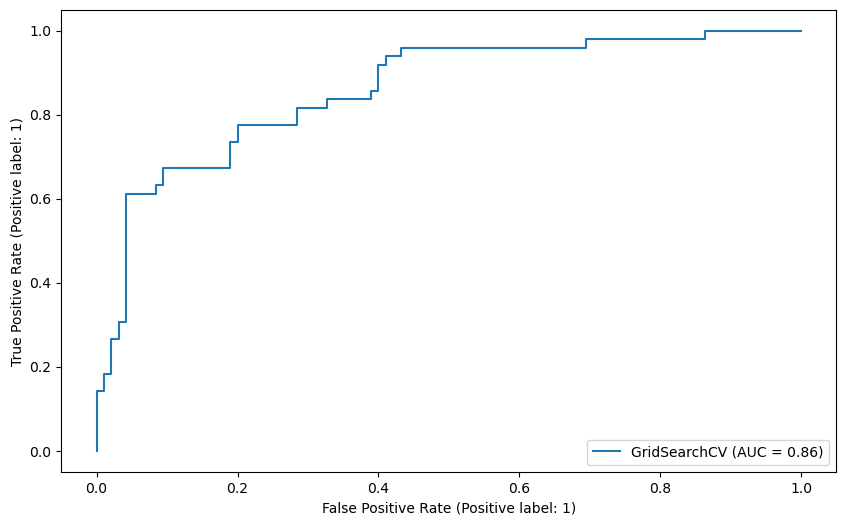

In [66]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

# unbalanced datalarda yanlı yorum yapmamızı sağlar. Yalancı iyimserlik sağlar.

## Precision Recall Curve

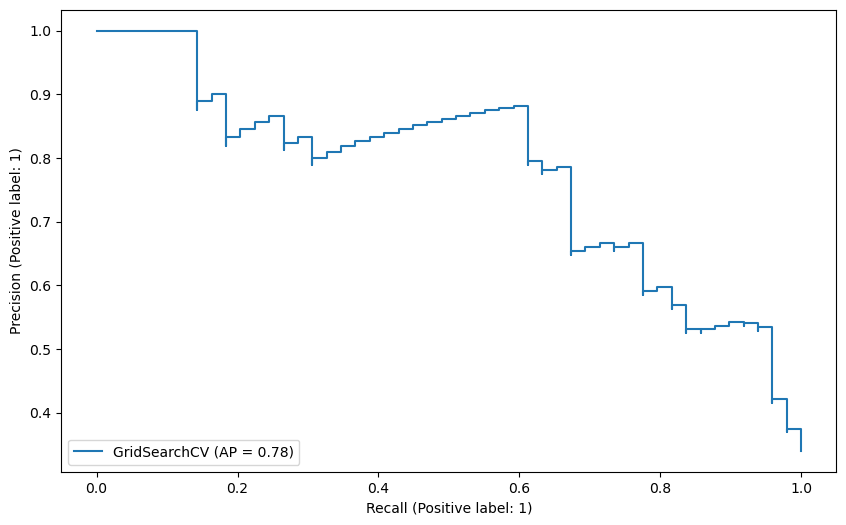

In [67]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

# unbalanced datalarda doğru yorum yapmamızı sağlar

# Finding Best Thresholds

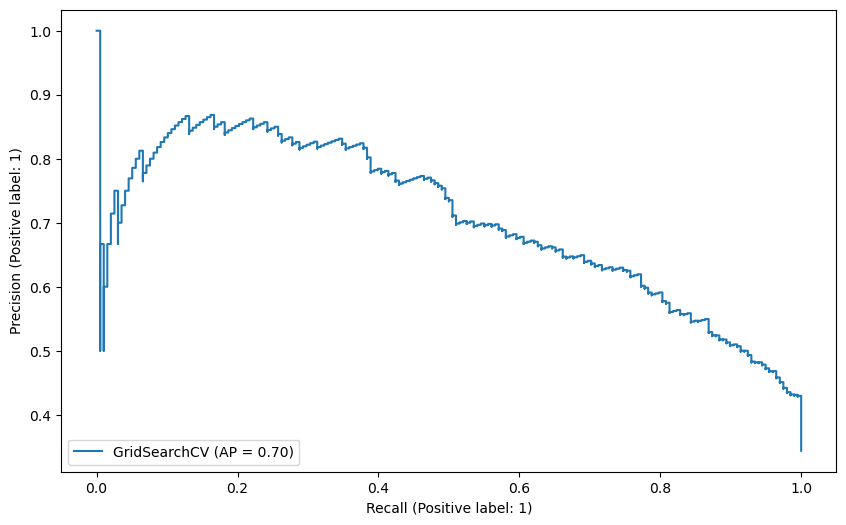

In [68]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train, y_train)

In [69]:
y_train_pred_proba = grid_model.predict_proba(X_train) # train datası üzerinden treshold belirliyoruz.

average_precision_score(y_train, y_train_pred_proba[:,1])

0.7039749907641873

In [70]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:, 1])

In [71]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds)) 

# treshold 1 olduğu durumdaki threshold değeri döndürmez. Ancak treshold 1 için precision ve recall değerlerini döndürür.

precision : 577
recall    : 577
threshold : 576


In [72]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

# precision ve recall değerleri thresholdan 1 eksik olduğundan precision ve recall değerlerinin en sonuncu değerlerini
# ignore ediyoruz.

# df_metric scorlarını önce recall sonra precision scorlarına göre sıralıyoruz.

# Burdaki yaptığımız sıralama hedeflediğimiz recall scoruna denk gelen en yüksek precision scorunu da döndürür.

# amacım max recall u max precision ile elde etmek

precisions   recalls  threshold
115    0.429501  1.000000   0.224453
114    0.428571  1.000000   0.222727
113    0.427646  1.000000   0.221421
112    0.426724  1.000000   0.217901
111    0.425806  1.000000   0.216196
..          ...       ...        ...
571    0.600000  0.015152   0.963333
573    0.666667  0.010101   0.969833
572    0.500000  0.010101   0.964121
575    1.000000  0.005051   0.988412
574    0.500000  0.005051   0.977212

[576 rows x 3 columns]

In [73]:
optimal_threshold = 0.224466

In [74]:
class_1_proba = grid_model.predict_proba(X_test)[:,1]
class_1_proba

array([0.86112915, 0.91895218, 0.54015564, 0.32834425, 0.84586396,
       0.19020939, 0.37229873, 0.89303998, 0.09180118, 0.23758391,
       0.42217932, 0.40054402, 0.32152637, 0.29622838, 0.91147102,
       0.0458172 , 0.31483894, 0.7783831 , 0.60683608, 0.17502035,
       0.59127022, 0.07183874, 0.85619768, 0.26772366, 0.35899683,
       0.42663339, 0.21360561, 0.5400797 , 0.47724611, 0.26626496,
       0.32222979, 0.47416383, 0.59968981, 0.29605571, 0.92993323,
       0.16407973, 0.56707298, 0.37507135, 0.66446097, 0.1788444 ,
       0.22573875, 0.10909588, 0.1156305 , 0.76816093, 0.45682279,
       0.48417757, 0.4512507 , 0.84198515, 0.89860896, 0.48442456,
       0.31847673, 0.22797754, 0.45358727, 0.06128429, 0.08594144,
       0.87896383, 0.65055612, 0.21426868, 0.72029565, 0.53913774,
       0.81873582, 0.62134865, 0.76005021, 0.91816077, 0.84383353,
       0.17311698, 0.33796696, 0.36854611, 0.96338232, 0.10317876,
       0.50366937, 0.22026545, 0.76706848, 0.24151202, 0.65058

In [75]:
y_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba]

# optimal thresholda göre sınıf atamalarını yapıyoruz. Ve yaptığımız bu sınıf atamalarını y_pred2'ye atıyoruz.

In [76]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[29 66]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.31      0.46        95
           1       0.42      0.98      0.59        49

    accuracy                           0.53       144
   macro avg       0.69      0.64      0.53       144
weighted avg       0.78      0.53      0.51       144



In [77]:
class_1_proba_train = grid_model.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

# aynı işlemi train seti içinde yapıyoruz.

[[115 263]
 [  1 197]]
              precision    recall  f1-score   support

           0       0.99      0.30      0.47       378
           1       0.43      0.99      0.60       198

    accuracy                           0.54       576
   macro avg       0.71      0.65      0.53       576
weighted avg       0.80      0.54      0.51       576



In [78]:
from ipywidgets import interactive, FloatSlider
from IPython.display import display

In [79]:
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

In [80]:
def generate_confusion_matrix(threshold):
    y_pred = (y_pred_proba[:, -1] >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f_1 = f1_score(y_test, y_pred)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Threshold = {threshold:.2f})')

    # Add text below the graph
    plt.text(0.5, -0.20, f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nAccuracy: {accuracy:.2f}\nf1-score: {f_1:.2f}',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

# Create interactive slider
threshold_slider = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description='Threshold')

# Create interactive widget
interactive_plot = interactive(generate_confusion_matrix, threshold=threshold_slider)

# Display the interactive widget
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [81]:
# Cross validation with optimal treshold

from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224456):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')
    
# optimal threshold için bildiğimiz classic Cross validation fonksiyonunu kullanamıyoruz. O yüzden burda manul olarak yazdığımız
# kodu kullanıyoruz. Scorlarla birlikte scorların standart sapamasına bakma sebebimiz, skorların birbirleriyle ne kadar benzer
# olduğunu görebilmek 

In [82]:
model = LogisticRegression(C=0.1, class_weight='balanced',penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

Accuracy           41.13%  std 2.89%

Test_Precision-1   36.52%  std 1.55%
Train_Precision-1  36.77%  std 0.49%

Test_Recall-1      96.47%  std 4.51%
Train_Recall-1     97.03%  std 0.26%

Test_F1_score-1    52.97%  std 2.12%
Train_F1_score-1   53.33%  std 0.53%


# Final Model and Model Deployment

In [83]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

# final modeli bulduğumuz en iyi hyper parametrelerle kuruyoruz.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [84]:
import pickle

In [85]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [86]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [87]:
X.describe().T

count        mean         std     min      25%  \
Pregnancies               720.0    3.880556    3.366308   0.000    1.000   
Glucose                   720.0  121.897222   30.649311  44.000  100.000   
BloodPressure             720.0   72.588889   12.075234  38.000   64.000   
SkinThickness             720.0   21.287500   15.476731   0.000    0.000   
Insulin                   720.0   84.676389  117.276853   0.000    0.000   
BMI                       720.0   32.424167    6.842008  18.200   27.475   
DiabetesPedigreeFunction  720.0    0.474885    0.333024   0.078    0.245   
Age                       720.0   33.338889   11.737350  21.000   24.000   

                              50%       75%     max  
Pregnancies                 3.000    6.0000   17.00  
Glucose                   117.000  142.0000  199.00  
BloodPressure              72.000   80.0000  122.00  
SkinThickness              24.000   33.0000   63.00  
Insulin                    48.000  132.0000  846.00  
BMI                        32.350   36.6000   67.10  
DiabetesPedigreeFunction    0.378    0.6295    2.42  
Age                        29.000   41.0000   81.00

In [88]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

# min, max değerlere göre 3 adet gözlem belirliyoruz.

In [89]:
sample = pd.DataFrame(my_dict)
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  
0                       0.4   30  
1                       0.5   40  
2                       0.6   35

In [90]:
sample_2 = sample.copy()

In [91]:
new_model.predict(sample)

array([0, 0, 0], dtype=int64)

In [92]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [93]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample

# default 0.5 threshold ve optimal thresholda göre aldığımız predictionları aşağıda gözlemleyebilriz.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  pred_proba  pred_0.50  pred_0.22  
0                       0.4   30    0.173919          0          0  
1                       0.5   40    0.444466          0          1  
2                       0.6   35    0.462018          0          1

## New Predictions for optimal_threshols

In [94]:
def predict(model, X_test, optimal_threshold = 0.224456):
    
    predict_proba = model.predict_proba(X_test)
    
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    
    return prediction

# optimal threshold için tanımladığımız predict fonksiyonu ile prediction alabiliriz.

In [95]:
sample_2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  
0                       0.4   30  
1                       0.5   40  
2                       0.6   35

In [96]:
y_pred = predict(final_model, sample_2)
y_pred

[0, 1, 1]